In [1]:
import pandas as pd

In [96]:
str_ = "20130110,2013-01-10 00:00:00.000,10,10th,Thursday,2,2,2,10,2,2,2,1,January,1,1,First,2013,CY 2013,Jan-2013 ,012013,2013-01-01,2013-01-31,2013-01-01,2013-03-31,2013-01-01,2013-12-31,1"

In [97]:
a = str_.split(',')
len(a)

28

In [98]:
l = []
for i in range(len(a)):
    if i == 1:
        x = f'TIMESTAMP {a[i]}'
    
    elif i >= 21 and i <= 26:
        x = f'DATE {a[i]}'
    else:
        x = f'{a[i]}'
    l.append(x)

l


['20130110',
 'TIMESTAMP 2013-01-10 00:00:00.000',
 '10',
 '10th',
 'Thursday',
 '2',
 '2',
 '2',
 '10',
 '2',
 '2',
 '2',
 '1',
 'January',
 '1',
 '1',
 'First',
 '2013',
 'CY 2013',
 'Jan-2013 ',
 '012013',
 'DATE 2013-01-01',
 'DATE 2013-01-31',
 'DATE 2013-01-01',
 'DATE 2013-03-31',
 'DATE 2013-01-01',
 'DATE 2013-12-31',
 '1']

In [99]:
import numpy as np

In [100]:
np.array(l)

array(['20130110', 'TIMESTAMP 2013-01-10 00:00:00.000', '10', '10th',
       'Thursday', '2', '2', '2', '10', '2', '2', '2', '1', 'January',
       '1', '1', 'First', '2013', 'CY 2013', 'Jan-2013 ', '012013',
       'DATE 2013-01-01', 'DATE 2013-01-31', 'DATE 2013-01-01',
       'DATE 2013-03-31', 'DATE 2013-01-01', 'DATE 2013-12-31', '1'],
      dtype='<U33')

In [1]:
from pycaret.time_series import *
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\GRACE ESTRADA\Anaconda3\lib\site-packages\sktime\utils\validation\series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
c:\Users\GRACE ESTRADA\Anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:18: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex)
c:\Users\GRACE ESTRADA\Anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:19: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
c:\Users\GRACE ESTRADA\Anaconda3\lib\site-packages\sktime\d

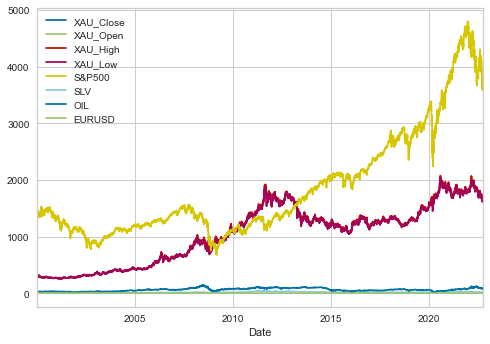

In [2]:
path = r"C:\Users\GRACE ESTRADA\OneDrive\Desktop\XAUUSD.csv"

xau = pd.read_csv(path, parse_dates = ['Date'])

xau = xau.sort_values('Date', ascending = True)
xau = xau.set_index('Date')
xau[xau < 0] = 0.00001
xau = xau.asfreq('B')
xau = xau[1:].ffill()
xau.plot()
plt.show()

In [3]:
s = setup(data = xau, target = 'XAU_Close', seasonal_period = 30, fh = 365, use_gpu = True)

,Description,Value
0,session_id,8581
1,Target,XAU_Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(5942, 8)"
5,Train data shape,"(5577, 8)"
6,Test data shape,"(365, 8)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [4]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,5942.0
1,Summary,Statistics,Actual,Mean,,1040.272359
2,Summary,Statistics,Actual,Median,,1189.24
3,Summary,Statistics,Actual,Standard Deviation,,519.461433
4,Summary,Statistics,Actual,Variance,,269840.180775
5,Summary,Statistics,Actual,Kurtosis,,-1.259976
6,Summary,Statistics,Actual,Skewness,,-0.091886
7,Summary,Statistics,Actual,# Distinct Values,,5347.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",140975.403838
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",278959.993982


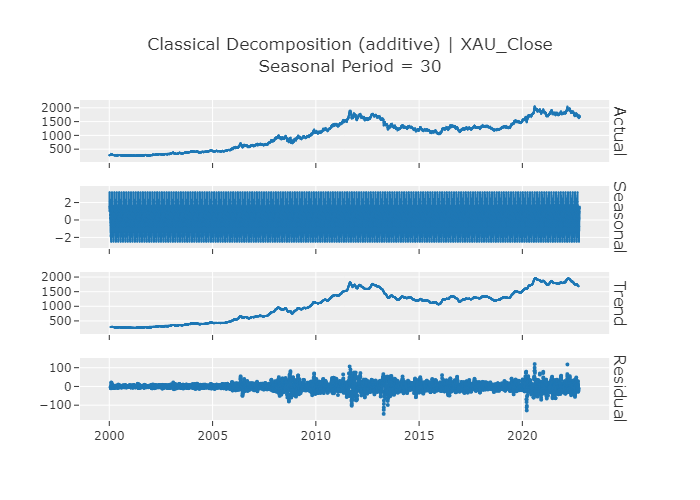

In [5]:
plot_model(plot = 'decomp_classical')

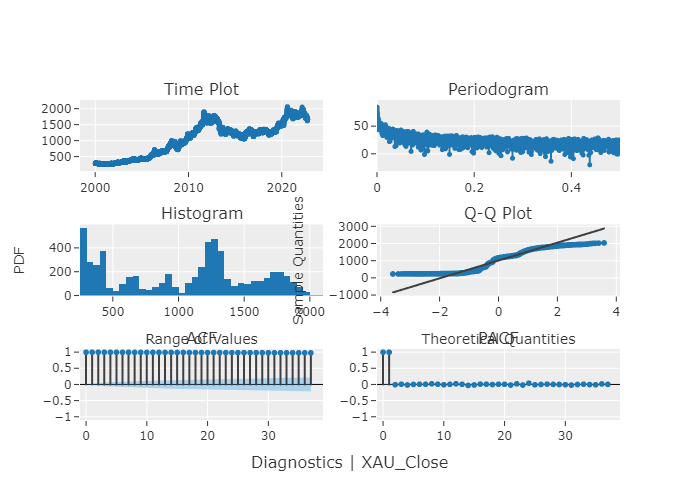

In [6]:
plot_model(plot = 'diagnostics')

In [7]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,3.6052,4.7062,0.0024,0.0024,0.0894,0.0807,0.9960,1170.7233
arima,ARIMA,4.8693,6.1072,0.0033,0.0033,0.1207,0.1045,0.9907,24.1967
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,36.6484,44.4609,0.0256,0.0261,0.9068,0.7584,0.3124,1.1200
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,42.3537,50.0439,0.0274,0.0279,1.0507,0.8574,0.5290,1.2867
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,52.8612,61.9857,0.0335,0.0343,1.3126,1.0636,0.4224,1.3867
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,105.3946,122.6361,0.0640,0.0669,2.6215,2.1104,-0.8616,8.3000
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,109.0350,129.7126,0.0658,0.0696,2.7116,2.2309,-1.0670,11.5233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,113.9312,133.4684,0.0691,0.0734,2.8320,2.2949,-1.2253,18.5633
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,117.5635,135.1886,0.0707,0.0753,2.9239,2.3264,-1.2071,6.0633
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,119.0601,140.4477,0.0716,0.0765,2.9599,2.4159,-1.4578,1.9833


In [16]:
s = setup(data = xau[['XAU_Close']], seasonal_period = 30, fh = 365)

,Description,Value
0,session_id,3565
1,Target,XAU_Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(5942, 1)"
5,Train data shape,"(5577, 1)"
6,Test data shape,"(365, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [17]:
s.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,103.8145,124.5811,0.0628,0.0661,2.5812,2.1417,-1.0242,0.1567
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,103.8147,124.5813,0.0628,0.0661,2.5812,2.1417,-1.0242,0.1067
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,103.8210,124.5843,0.0628,0.0661,2.5814,2.1417,-1.0245,0.1000
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,103.8145,124.5811,0.0628,0.0661,2.5812,2.1417,-1.0242,0.1533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,104.1262,124.7960,0.0630,0.0663,2.5891,2.1455,-1.0163,0.0967
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,110.2052,131.7494,0.0673,0.0706,2.7385,2.2630,-1.5410,0.1533
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,110.6809,132.3289,0.0676,0.0709,2.7503,2.2730,-1.5574,0.1600
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,111.2502,130.2661,0.0674,0.0714,2.7665,2.2407,-1.0079,0.5933
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,112.0265,131.8947,0.0678,0.0720,2.7859,2.2688,-1.0263,1.2600
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,113.7559,128.0271,0.0696,0.0732,2.8290,2.2027,-1.0009,0.7867


BaseCdsDtForecaster(regressor=LinearRegression(n_jobs=-1), sp=30,
                    window_length=30)

In [34]:
xau_train = xau.drop(columns = ['XAU_Low', 'XAU_High'])['2000-01-01':'2021-12-31']

endog = xau['XAU_Close']
exog = xau.drop(columns = ['XAU_Close', 'XAU_Low', 'XAU_High'])

endog_train = xau[['XAU_Close']]['2000-01-01':'2021-12-31']
endog_test = xau[['XAU_Close']]['2022-01-01':]

exog_train = xau.drop(columns = ['XAU_Close', 'XAU_Low', 'XAU_High'])['2000-01-01':'2021-12-31']
exog_test = xau.drop(columns = ['XAU_Close', 'XAU_Low', 'XAU_High'])['2022-01-01':]

In [37]:
s = setup(data = xau_train, target = 'XAU_Close', seasonal_period = 30, fh = 203)

,Description,Value
0,session_id,4303
1,Target,XAU_Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(5739, 6)"
5,Train data shape,"(5536, 6)"
6,Test data shape,"(203, 6)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [38]:
s.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,11.1056,15.7757,0.0068,0.0068,0.2746,0.2707,0.9597,38.8100
arima,ARIMA,20.2341,26.1722,0.0126,0.0126,0.5009,0.4493,0.8960,12.8367
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,54.6285,67.6559,0.0336,0.0346,1.3538,1.1627,0.2914,0.4400
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,85.0353,109.1698,0.0514,0.0535,2.1035,1.8742,-0.8913,1.2300
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,86.7411,107.4482,0.0521,0.0541,2.1442,1.8439,-0.9007,3.1400
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,86.8680,104.3489,0.0525,0.0546,2.1480,1.7910,-0.7679,1.1967
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,90.0409,109.4409,0.0550,0.0571,2.2277,1.8786,-0.9534,7.0867
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,90.8703,110.4933,0.0555,0.0576,2.2483,1.8967,-0.9903,3.3067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,94.4219,110.0324,0.0572,0.0595,2.3343,1.8883,-1.0412,1.2533
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,106.4180,126.2060,0.0644,0.0659,2.6289,2.1647,-1.7355,1.2467


AutoARIMA(random_state=4303, sp=30, suppress_warnings=True)